<a href="https://colab.research.google.com/github/viveksengupta/data-science/blob/master/w1_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting whether a light is on or off

I have collected the data for one of my lights over a period of about 2 months. In this exercise we will train a tensorflow model to predict the state of the light from the following featuers:
* hour of the day
* day of the week
* minutes since the last state change in the home (log scaled)
* miuntes since the last utterance in the home (log scaled)
* the elevation of the sun (scaled between -1 and -1)
* mean onoff state (the proportion of other lights in the home that are on)

**Exercise:** Which of these features would you expect to be the most important? Can you think of any other features that would help?

First lets executre the code from the lecture and the code from the slides, just to make sure it works.

In [0]:
# import some modules that we will use in the notebook
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [0]:
# code from the week 1 lectures
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0], dtype=float)

model.fit(xs, ys, epochs=100)

print("prediction = %s" % model.predict([1]))

Epoch 1/100
10/10 [==============================] - 0s 18ms/sample - loss: 217.9107
Epoch 2/100
10/10 [==============================] - 0s 424us/sample - loss: 73.3834
Epoch 3/100
10/10 [==============================] - 0s 515us/sample - loss: 25.1200
Epoch 4/100
10/10 [==============================] - 0s 159us/sample - loss: 8.9965
Epoch 5/100
10/10 [==============================] - 0s 629us/sample - loss: 3.6039
Epoch 6/100
10/10 [==============================] - 0s 466us/sample - loss: 1.7941
Epoch 7/100
10/10 [==============================] - 0s 159us/sample - loss: 1.1806
Epoch 8/100
10/10 [==============================] - 0s 283us/sample - loss: 0.9667
Epoch 9/100
10/10 [==============================] - 0s 170us/sample - loss: 0.8864
Epoch 10/100
10/10 [==============================] - 0s 124us/sample - loss: 0.8508
Epoch 11/100
10/10 [==============================] - 0s 156us/sample - loss: 0.8303
Epoch 12/100
10/10 [==============================] - 0s 134us/sample -

##  Classification Network

Next expand our network to perform *classification* instead.

We typically use [cross-entroy](https://https://en.wikipedia.org/wiki/Cross_entropy) for classification, and the Adam optimizer instead of SGD (see here for comparison: http://ruder.io/optimizing-gradient-descent/). Adam tends to not diverge as much as SGD.


In [0]:
# code from the slides

# Init new empty feed-forward network
model = tf.keras.Sequential()

# Add a single neuron
model.add(keras.layers.Dense(1, input_shape=[1], activation="relu"))

# Add SoftMax layer to turn output into two classes
model.add(keras.layers.Dense(2, activation="softmax"))

# Define an optimizer for classification.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# Print out the model structure
model.summary()

# Define some dummy input data
xs = np.array([-1.0, 2.0, -3.0, 4.0, -5.0, 6.0], dtype=float)
ys = np.array([[0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0]], dtype=float)

# Fit model to the data
model.fit(xs, ys, epochs=10)

# Evaluate the model on two sample inputs (-2 and 2)
print("prediction = %s" % model.predict([-2, 2]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 0s 21ms/sample - loss: 0.5098 - acc: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 569us/sample - loss: 0.5088 - acc: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 321us/sample - loss: 0.5078 - acc: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 608us/sample - loss: 0.5068 - acc: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 298us/sample - loss: 0.5058 - acc: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 466us/sample - lo

**Exercise:** Do the above predictions look correct? Why are there four outputs from the two inputs?

Now lets load my smart home dataset:

In [0]:
# make the dataset accessible to this notebook
!git clone https://github.com/ceabrett/tf_course.git

# load the dataset into a pandas dataframe and show the beginning of the dataset
df = pd.read_csv("tf_course/data.csv")
df.head()

Cloning into 'tf_course'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 62 (delta 31), reused 16 (delta 5), pack-reused 0
Unpacking objects: 100% (62/62), done.


,dow_f,hour_f,log_mins_since_any_onoff,log_mins_since_utt,mean_onoff_state,state,sun_elevation
0,3.666667,16.00,3.418493,6.053619,0.2,1,0.024071
1,3.677083,16.25,3.818226,6.088252,0.2,1,0.004045
2,3.687500,16.50,4.103030,6.121726,0.2,1,-0.016666
3,3.697917,16.75,4.324442,6.154116,0.2,1,-0.047375
4,3.708333,17.00,1.963954,1.368262,0.4,1,-0.073805


In [0]:
# some summary statistics about the data
df.describe()

,dow_f,hour_f,log_mins_since_any_onoff,log_mins_since_utt,mean_onoff_state,state,sun_elevation
count,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000
mean,3.500028,11.875693,4.463248,5.275338,0.235272,0.263901,-0.178586
std,2.036206,6.928034,1.342702,1.261047,0.171756,0.440783,0.324940
min,0.000000,0.000000,0.011682,0.021452,0.000000,0.000000,-0.730116
25%,1.718750,6.000000,3.683634,4.625277,0.071429,0.000000,-0.484594
50%,3.531250,12.000000,4.715919,5.515032,0.214286,0.000000,-0.155060
75%,5.270833,17.750000,5.482503,6.136417,0.357143,1.000000,0.133980
max,6.989583,23.750000,7.572345,8.006151,0.800000,1.000000,0.350472


The dataset contains several features for a  number of samples that are snapshots of the current state of a light:
* dow_f: Numerical day-of-week feature
* hour_f: Numerical hour since midnight
* log_mins_since_any_onoff: Minutes since last on/off switch of any device
* log_mins_since_utt: Minutes since customer said something to Alexa
* mean_onoff_state: Fraction of time this device is on on overage
* state: The actual state (0=off, 1=on; other values are dimmed light)
* sun_elevation: Encoding of day-night cycle

We want to predict "state" using everything else as a feature, so lets seperate them. Tensorflow expects us to pass seperately the features and the label to the fit function.

In [0]:
# to keep things simple initially, lets just use 1 feature, "hour_f"
feat_names = ["hour_f"]

# later we can use all features by uncommenting the below line
#feat_names = [feat_name for feat_name in df.columns if feat_name != "state"]

feats = df[feat_names]
label = df["state"]

# tensorflow is expecting the features vector to be a 2 dimensional array, not a pandas dataframe. But we can get the underlying array with .values
xs_light = feats.values
ys_light = label.values

# for classification into 2 classes our output dimension should be 2
# currently ys looks like [0, 1, 0 ...], but we want [[0, 1], [1, 0], [0, 1],..]
# luckily there is a helper function which does this mapping for us
from keras.utils import np_utils
ys_light = np_utils.to_categorical(ys_light, 2)

Using TensorFlow backend.


Now lets train our classification model on the real data.

In [0]:
# code from the slides
model = tf.keras.Sequential()

# Single-neuron layer for a single input, as in the coursera example
model.add(keras.layers.Dense(1, input_shape=[1], activation="relu"))

# Adding a SoftMax layer with two outputs (for off and on) to turn the output into a two-class classification
model.add(keras.layers.Dense(2, activation="softmax"))

# Cross-entropy optimizer for classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# Print model graph summary
model.summary()

# Fit model parameters to data
model.fit(xs_light, ys_light, epochs=10)

# Make two predictions for the state of a light at hours 4 and 17.
print("prediction = %s" % model.predict([4, 17]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5953/5953 [==============================] - 0s 75us/sample - loss: 0.7742 - acc: 0.7104
Epoch 2/10
5953/5953 [==============================] - 0s 48us/sample - loss: 0.6369 - acc: 0.7361
Epoch 3/10
5953/5953 [==============================] - 0s 48us/sample - loss: 0.6065 - acc: 0.7361
Epoch 4/10
5953/5953 [==============================] - 0s 40us/sample - loss: 0.5838 - acc: 0.7361
Epoch 5/10
5953/5953 [==============================] - 0s 38us/sample - loss: 0.5663 - acc: 0.7361
Epoch 6/10
5953/5953 [======================

**Exercise:** Do these predictions make sense?

Let's visualize our model to see if we can better understand what is going on.

predictions = [[0.86018336 0.13981663]
 [0.8543923  0.14560771]
 [0.8442236  0.15577632]
 [0.83348334 0.16651668]
 [0.8221585  0.17784156]
 [0.8102387  0.1897613 ]
 [0.7977167  0.20228338]
 [0.78458786 0.2154121 ]
 [0.7708519  0.22914807]
 [0.7565116  0.24348834]
 [0.74157506 0.25842494]
 [0.7260539  0.27394614]
 [0.70996505 0.29003486]
 [0.69333065 0.30666938]
 [0.67617714 0.32382283]
 [0.65853685 0.34146315]
 [0.6404466  0.35955343]
 [0.62194824 0.37805182]
 [0.6030877  0.39691228]
 [0.58391553 0.4160844 ]
 [0.5644865  0.43551344]
 [0.5448572  0.4551428 ]
 [0.52508754 0.47491255]]


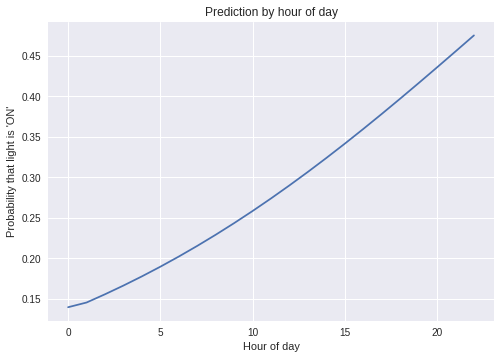

In [0]:
import matplotlib.pyplot as plt

def plot(model):
  # plot one point for each hour of the day
  hours = range(23)
  preds = model.predict(hours)
  print("predictions = %s" % preds)
  plt.plot(hours, preds[:, -1])
  plt.xlabel("Hour of day")
  plt.ylabel("Probability that light is 'ON'")
  plt.title("Prediction by hour of day")
  
plot(model)

OK, so later in the day it is more likely that the light is on. This is a believable pattern. But the fitted pattern seems overly simplistic. For example, there's a discontinuity from 23:59 to 00:00. We can do better.

One way would be to train a more complex model (e.g. a deeper network with more neurons). Another way for this exercise it to perform "feature engineering", i.e. find a better representation of the features. Let's convert the hour-of-day into a two-dimensional representation - it can be understood as horizontal + vertical position of the hour-arm of an analog clock (https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/):

In [0]:
# lets get more advanced and do a little "feature engineering"

xs_light = df[["hour_f"]].values
print("xs before: %s" % xs_light)

# some magic math operations to convert this into a 2 dimensional variable
import math
def transform_hour(xs):
  xs_cos = np.cos((2 * math.pi * xs) / 24.0)
  xs_sin = np.sin((2 * math.pi * xs) / 24.0)
  xs = np.concatenate([xs_cos, xs_sin], axis=1)
  return xs

xs_light = transform_hour(xs_light)
print("xs after: %s" % xs_light)

xs before: [[16.  ]
 [16.25]
 [16.5 ]
 ...
 [15.5 ]
 [15.75]
 [16.  ]]
xs after: [[-0.5        -0.8660254 ]
 [-0.44228869 -0.89687274]
 [-0.38268343 -0.92387953]
 ...
 [-0.60876143 -0.79335334]
 [-0.55557023 -0.83146961]
 [-0.5        -0.8660254 ]]


Now let's train a model on this new representation as its input. We need to increase the size of the input shape since we now have tow input features (see Keras documentation https://keras.io/layers/core/).

In [0]:
# train a model with these features
model = tf.keras.Sequential()

# The first layer now has two inputs (input_shape=[2])
model.add(keras.layers.Dense(32, input_shape=[2], activation="relu"))

# Otherwise same structure. Two outputs for Off and On.
model.add(keras.layers.Dense(2, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

model.fit(xs_light, ys_light, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5953/5953 [==============================] - 0s 64us/sample - loss: 0.6074 - acc: 0.6355
Epoch 2/10
5953/5953 [==============================] - 0s 40us/sample - loss: 0.4675 - acc: 0.7821
Epoch 3/10
5953/5953 [==============================] - 0s 39us/sample - loss: 0.4510 - acc: 0.7860
Epoch 4/10
5953/5953 [==============================] - 0s 38us/sample - loss: 0.4445 - acc: 0.7857
Epoch 5/10
5953/5953 [==============================] - 0s 38us/sample - loss: 0.4408 - acc: 0.7852
Epoch 6/10
5953/5953 [==================

...and plot the model prediction for hours 0-23:

[[0.9478528  0.05214717]
 [0.97855514 0.02144483]
 [0.98677874 0.01322127]
 [0.9882522  0.01174781]
 [0.98664516 0.01335483]
 [0.9782019  0.02179806]
 [0.95626533 0.04373465]
 [0.90411896 0.09588104]
 [0.7975486  0.20245138]
 [0.68964493 0.310355  ]
 [0.6979926  0.3020074 ]
 [0.71390283 0.28609717]
 [0.73522496 0.2647751 ]
 [0.7574867  0.24251328]
 [0.7502043  0.24979566]
 [0.6442733  0.35572675]
 [0.50613815 0.49386188]
 [0.39064118 0.60935885]
 [0.31907746 0.68092257]
 [0.31800446 0.6819956 ]
 [0.36871663 0.63128334]
 [0.49360892 0.50639105]
 [0.6891239  0.310876  ]]
predictions = [[0.9478528  0.05214717]
 [0.97855514 0.02144483]
 [0.98677874 0.01322127]
 [0.9882522  0.01174781]
 [0.98664516 0.01335483]
 [0.9782019  0.02179806]
 [0.95626533 0.04373465]
 [0.90411896 0.09588104]
 [0.7975486  0.20245138]
 [0.68964493 0.310355  ]
 [0.6979926  0.3020074 ]
 [0.71390283 0.28609717]
 [0.73522496 0.2647751 ]
 [0.7574867  0.24251328]
 [0.7502043  0.24979566]
 [0.6442733  0.35572675]
 [0.506138

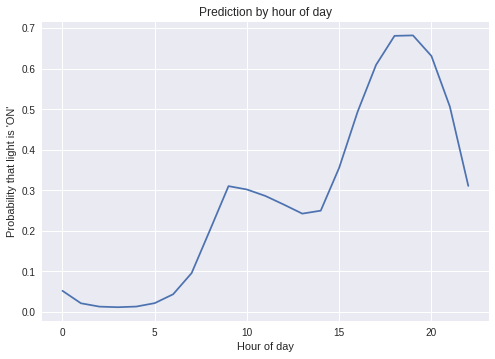

In [0]:
import matplotlib.pyplot as plt
def plot(model):
  # plot one point for each hour of the day
  hours = np.array([[h] for h in range(23)])
  hours_transformed = transform_hour(hours)
  preds = model.predict(hours_transformed)
  print(preds)
  print("predictions = %s" % preds)
  plt.plot(hours, preds[:, -1])
  plt.xlabel("Hour of day")
  plt.ylabel("Probability that light is 'ON'")
  plt.title("Prediction by hour of day")
  
plot(model)

That's more like it! A peak in the morning and a peak in the evening. This model is now prediction in a way that is much more consistent with observed historical patterns.

We also see that the probability for the light left on between 1AM and 4AM in the morning is very low. This could be an opportunity to e.g. send a Hunch to the customer about any lights that were left on during that time.

**Exercise:** So far we have only used 1 feature, the hour of the day. Go back and train a model using all the features. The accuracy should improve a lot.
Look at the documentation of the functions used () to see how to define parameters.

**Exercise:** Follow the instructions on the slides to train a keras model in Eider, the amazon internal tool

**Exercise:** We just looked at predictions visually. How can we assess objectively whether a model is better than another? (-> create a [test dataset](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7))